<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

#### Import section

##### Library import

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, auc, roc_curve, precision_recall_curve, average_precision_score, accuracy_score, precision_score, roc_auc_score, recall_score

In [162]:
#file location
file = "../DATA/breast-cancer-wisconsin.data"

In [163]:
#create dataframe with data
df = pd.read_csv(file)

In [164]:
df.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


data info
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [165]:
#used diagnosis as class is a restricted word in python
colnames = ['id', 
            'clump_thickness', 
            'uniformity_of_cell_size',
            'uniformity_of_cell_shape',
            'marginal_adhension',
            'single_epithelial_cell_size',
            'bare_nuceli',
            'bare_chromatin',
            'normal_nucleoli',
            'mitoses',
            'diagnosis'
]

In [166]:
df.columns = colnames

In [167]:
df.head()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhension,single_epithelial_cell_size,bare_nuceli,bare_chromatin,normal_nucleoli,mitoses,diagnosis
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [168]:
#set id as index
df.set_index(keys = 'id', inplace = True)

In [169]:
#sort the index
df.sort_index(inplace = True)

#rename our diagnosis to B for benign and M for malignant
classes = {2: 'B', 4: 'M'}
df['diagnosis'] = df['diagnosis'].map(classes)

In [170]:
df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhension,single_epithelial_cell_size,bare_nuceli,bare_chromatin,normal_nucleoli,mitoses,diagnosis
id,,,,,,,,,,
61634,5,4,3,1,2,?,2,3,1,2
63375,9,1,2,6,4,10,7,7,2,4
76389,10,4,7,2,2,8,6,1,1,4
95719,6,10,10,10,8,10,7,10,7,4
128059,1,1,1,1,2,5,5,1,1,2


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [171]:
df.shape

(698, 10)

In [172]:
df.isna().sum()

clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhension             0
single_epithelial_cell_size    0
bare_nuceli                    0
bare_chromatin                 0
normal_nucleoli                0
mitoses                        0
diagnosis                      0
dtype: int64

In [173]:
df.nunique()

clump_thickness                10
uniformity_of_cell_size        10
uniformity_of_cell_shape       10
marginal_adhension             10
single_epithelial_cell_size    10
bare_nuceli                    11
bare_chromatin                 10
normal_nucleoli                10
mitoses                         9
diagnosis                       2
dtype: int64

from first inspection it seems bare_nuceli has an outlier as the value should range from 1 - 10 but lets have another view of the data before i decide to drop it or change it

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 61634 to 13454352
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   clump_thickness              698 non-null    int64 
 1   uniformity_of_cell_size      698 non-null    int64 
 2   uniformity_of_cell_shape     698 non-null    int64 
 3   marginal_adhension           698 non-null    int64 
 4   single_epithelial_cell_size  698 non-null    int64 
 5   bare_nuceli                  698 non-null    object
 6   bare_chromatin               698 non-null    int64 
 7   normal_nucleoli              698 non-null    int64 
 8   mitoses                      698 non-null    int64 
 9   diagnosis                    698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.0+ KB


we again see that bare_nuceli seems to be an object which is not right

In [175]:
df['bare_nuceli'].value_counts()

1     401
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuceli, dtype: int64

the ? explains why it is an object. i will replace the ? with np.nan

In [176]:
df['bare_nuceli'].replace(to_replace = '?', value = np.nan, inplace = True)

In [177]:
#now i need to change the column to a int
df['bare_nuceli'] = df['bare_nuceli'].astype(float)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 61634 to 13454352
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clump_thickness              698 non-null    int64  
 1   uniformity_of_cell_size      698 non-null    int64  
 2   uniformity_of_cell_shape     698 non-null    int64  
 3   marginal_adhension           698 non-null    int64  
 4   single_epithelial_cell_size  698 non-null    int64  
 5   bare_nuceli                  682 non-null    float64
 6   bare_chromatin               698 non-null    int64  
 7   normal_nucleoli              698 non-null    int64  
 8   mitoses                      698 non-null    int64  
 9   diagnosis                    698 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 60.0 KB


In [179]:
df.isna().sum()

clump_thickness                 0
uniformity_of_cell_size         0
uniformity_of_cell_shape        0
marginal_adhension              0
single_epithelial_cell_size     0
bare_nuceli                    16
bare_chromatin                  0
normal_nucleoli                 0
mitoses                         0
diagnosis                       0
dtype: int64

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

lets start by imputing our missing values

In [180]:
df['bare_nuceli'].fillna(df.groupby(["diagnosis"])['bare_nuceli'].transform('median'),inplace=True)

In [181]:
df.isna().sum()

clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhension             0
single_epithelial_cell_size    0
bare_nuceli                    0
bare_chromatin                 0
normal_nucleoli                0
mitoses                        0
diagnosis                      0
dtype: int64

In [183]:
scaler = MinMaxScaler()
normalized_feat = scaler.fit_transform(df)

In [189]:
normalized_df = pd.DataFrame(normalized_feat, columns = colnames[1:])

In [190]:
normalized_df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhension,single_epithelial_cell_size,bare_nuceli,bare_chromatin,normal_nucleoli,mitoses,diagnosis
0,0.444444,0.333333,0.222222,0.000000,0.111111,0.000000,0.111111,0.222222,0.000000,0.0
1,0.888889,0.000000,0.111111,0.555556,0.333333,1.000000,0.666667,0.666667,0.111111,1.0
2,1.000000,0.333333,0.666667,0.111111,0.111111,0.777778,0.555556,0.000000,0.000000,1.0
3,0.555556,1.000000,1.000000,1.000000,0.777778,1.000000,0.666667,1.000000,0.666667,1.0
4,0.000000,0.000000,0.000000,0.000000,0.111111,0.444444,0.444444,0.000000,0.000000,0.0


<AxesSubplot:>

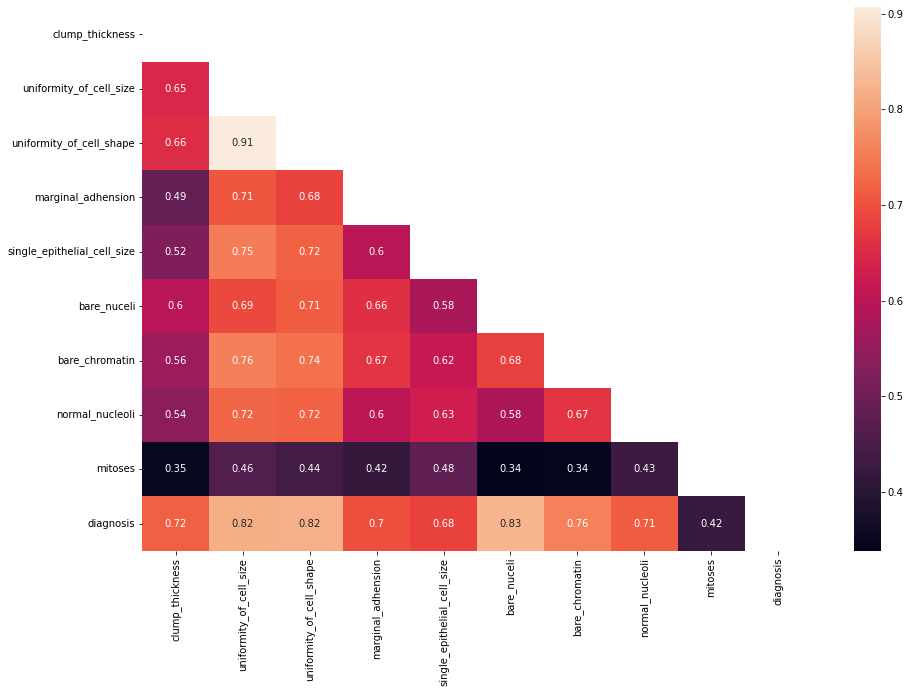

In [229]:
corr = normalized_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data = normalized_df.corr(), annot = True, mask = mask)

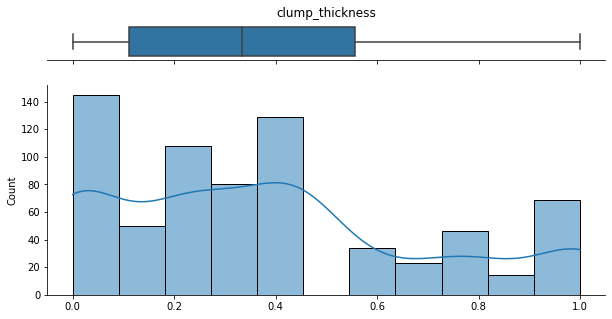

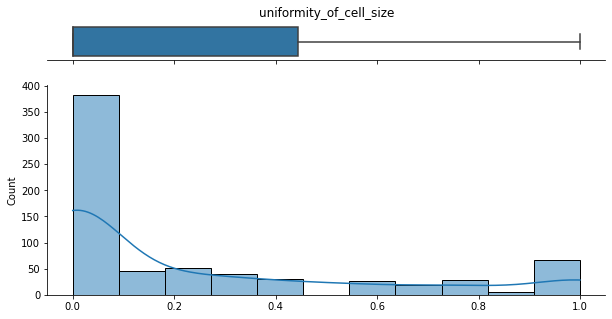

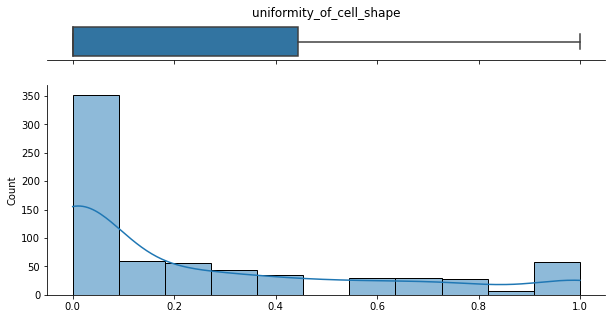

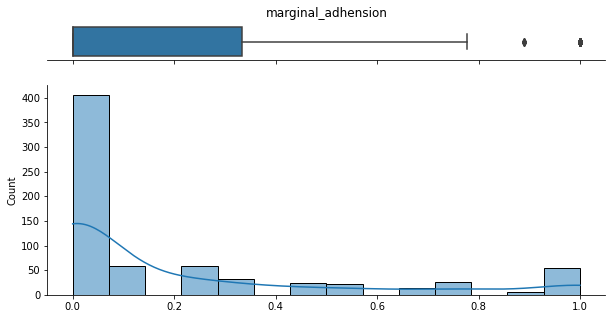

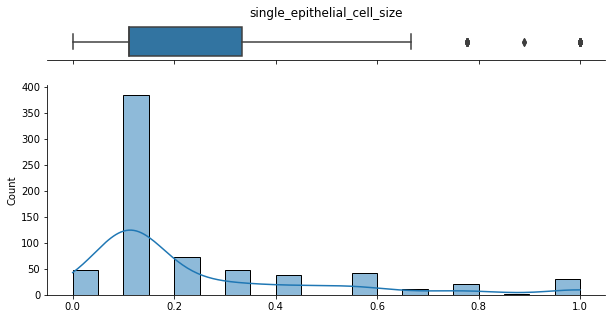

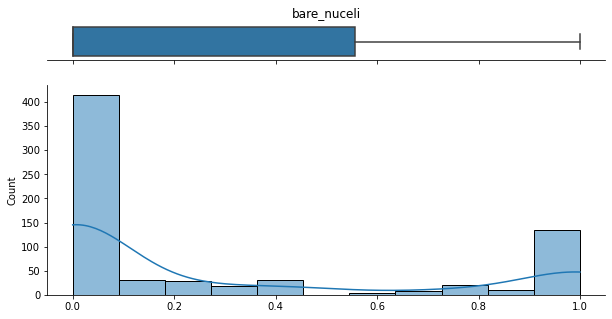

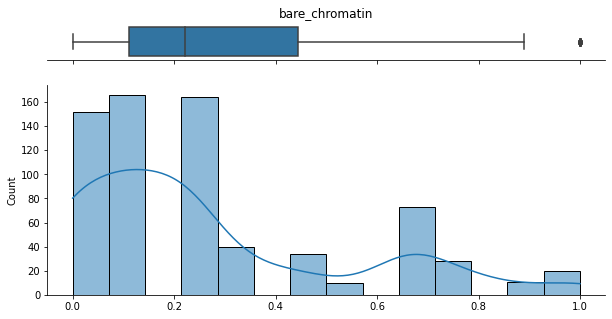

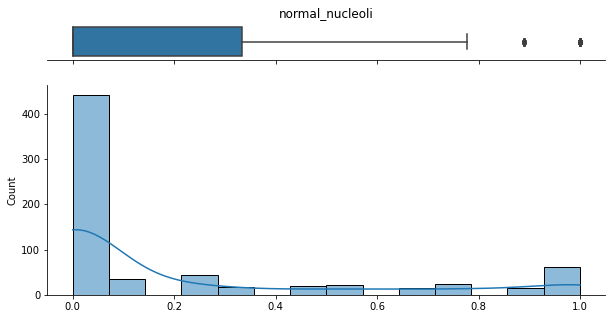

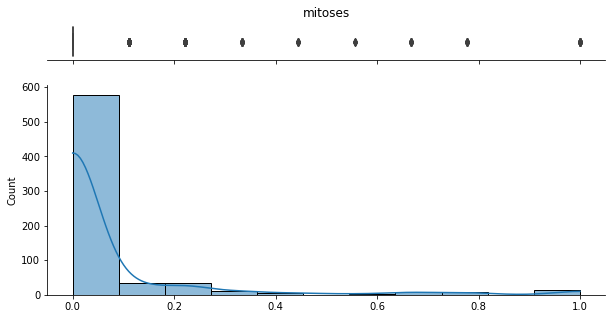

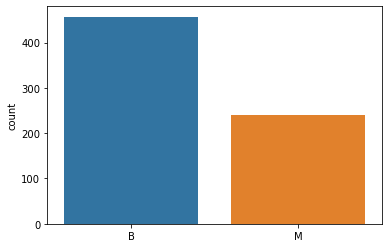

In [255]:
for c in normalized_df.columns:
    if c == 'diagnosis':
        fig, ax = plt.subplots()
        ax = sns.countplot(x = normalized_df[c])
        ax.set(xlabel = '',xticklabels=['B','M'])
        sns.despine(ax = ax_hist)
    else:
        fig, ax = plt.subplots(2, figsize = (10, 5), sharex = True, gridspec_kw = {'height_ratios' : (0.15, 0.85)})

        ax_box = ax[0]
        ax_box = sns.boxplot(x = normalized_df[c], ax = ax_box)
        ax_box.set(title = c, yticks = [], xlabel = '')
        sns.despine(ax = ax_box, left = True)

        ax_hist = ax[1]

        ax_hist = sns.histplot(x = normalized_df[c], ax = ax_hist, kde = True)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? All other columns
- Is there an output variable (label)? Diagnosis
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [X] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [X] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

#### Setting up dependent and independent variables

##### Target Variable

In [237]:
y = normalized_df['diagnosis']

##### Independent variables

In [240]:
X = normalized_df.drop('diagnosis', axis = 1)

You could consider to drop either the uniformity_of_cell_size or the uniformity_of_cell_shape as they are highly correlated as we saw earlier.

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [243]:
y.value_counts()

0.0    457
1.0    241
Name: diagnosis, dtype: int64

In [249]:
print((y.value_counts(normalize = True)*100).round(2))

0.0    65.47
1.0    34.53
Name: diagnosis, dtype: float64


I don't believe we require any under or over sampling in this case

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, stratify = y)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

Decision Tree

In [298]:
kfold = KFold(n_splits = 10)

dtc = DecisionTreeClassifier(max_depth = 5, random_state = 101)
dtc.fit(X_train, y_train)

results = cross_val_score(dtf, X_train, y_train, cv = kfold)

print('Descision Tree, Cross-Valisdation mean : %.4f' % results.mean())

Descision Tree, Cross-Valisdation mean : 0.9336


In [333]:
feature_imp = pd.DataFrame(dtc.feature_importances_)

In [335]:
feature_imp['features'] = X_train.columns.tolist()

In [343]:
feature_imp.columns = ['importance', 'features']

<BarContainer object of 9 artists>

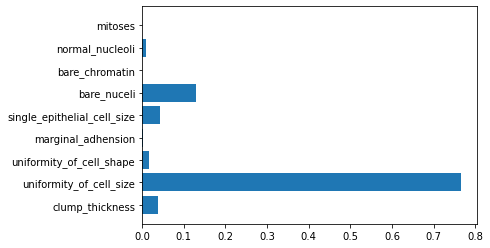

In [345]:
plt.barh(data = feature_imp, y = 'features', width = feature_imp['importance'])

In [348]:
dtc.feature_importances_

array([0.03728753, 0.76580649, 0.01537363, 0.00086444, 0.04374034,
       0.12846664, 0.        , 0.00846092, 0.        ])

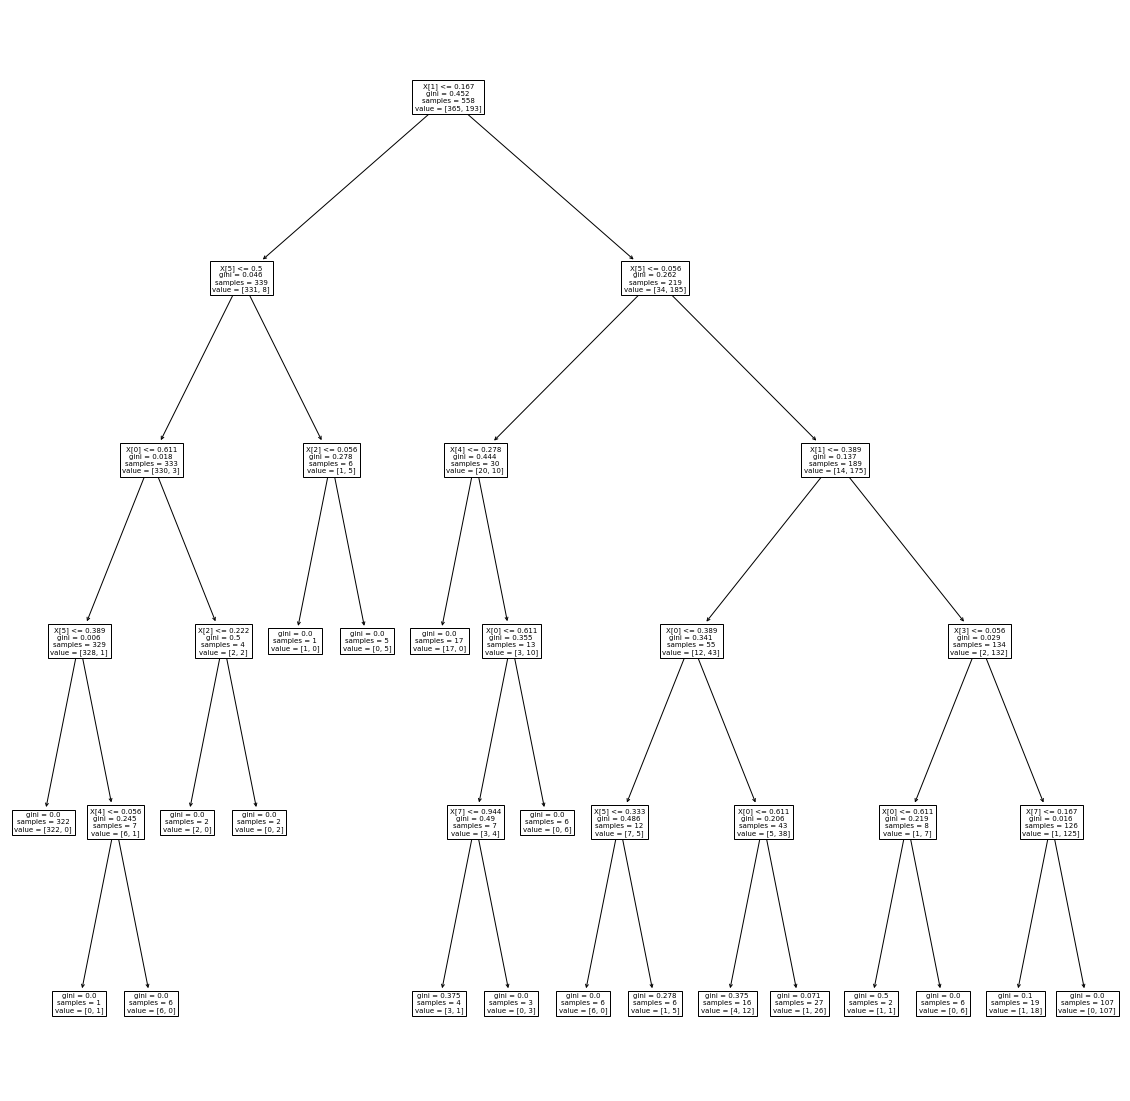

In [324]:
plt.figure(figsize = (20,20))
plot_tree(dtc)

plt.show()

##### Implementing bagging

In [299]:
bcf = BaggingClassifier(base_estimator = dtc, n_estimators = 100, random_state = 101)

bcf.fit(X_train, y_train)

results = cross_val_score(bcf, X_train, y_train, cv = kfold)

print('Descision Tree, Cross-Valisdation mean : %.4f' % results.mean())

Descision Tree, Cross-Valisdation mean : 0.9534


#### Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [311]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [319]:
# Evaluate model against training set
y_train_pred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)

Accuracy : 0.9839 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9646 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9896 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9982                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


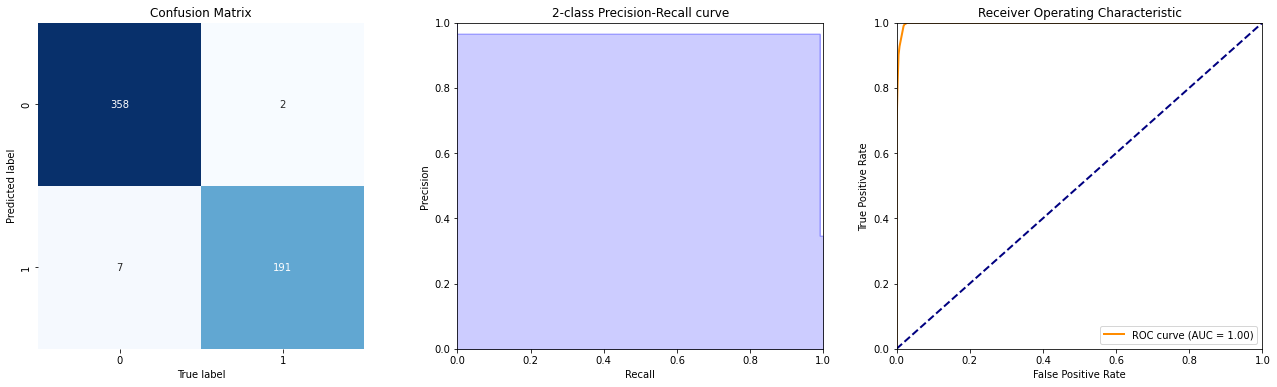

In [320]:
show_summary_report(y_train, y_train_pred, y_train_prob)

In [321]:
# Evaluate model against training set
y_train_pred = bcf.predict(X_train)
y_train_prob = bcf.predict_proba(X_train)

Accuracy : 0.9821 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9552 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9948 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9996                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


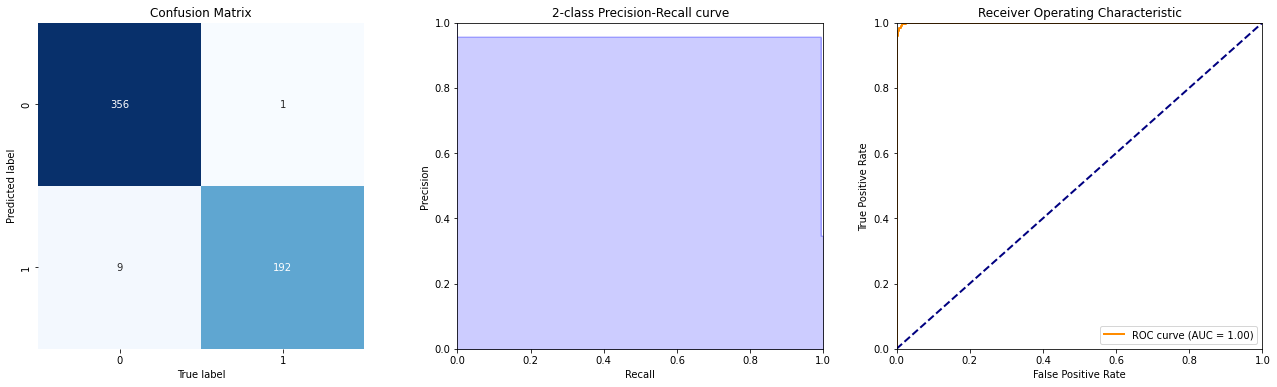

In [322]:
show_summary_report(y_train, y_train_pred, y_train_prob)

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [351]:
y_test_pred = dtc.predict(X_test)
y_test_proba = dtc.predict_proba(X_test)

Accuracy : 0.9500 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9556 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8958 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9621                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


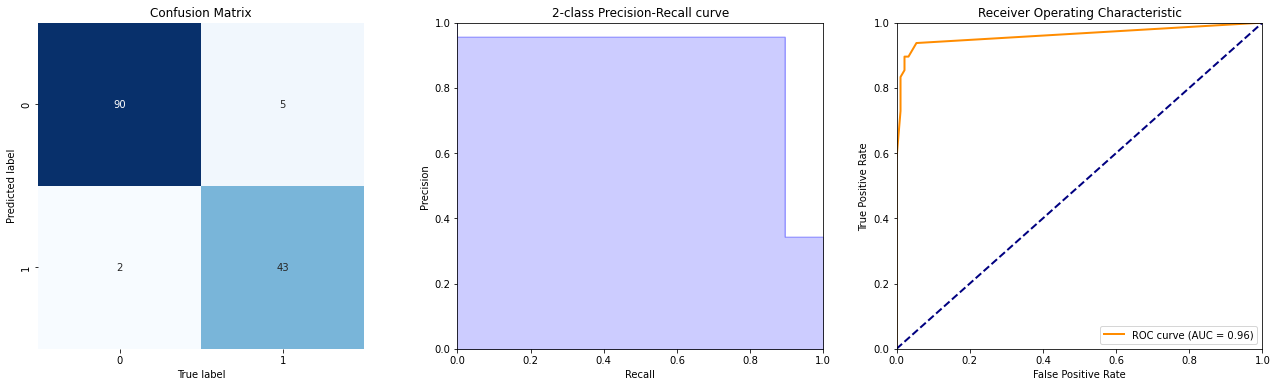

In [352]:
show_summary_report(y_test, y_test_pred, y_test_proba)

In [353]:
y_test_pred = bcf.predict(X_test)
y_test_proba = bcf.predict_proba(X_test)

Accuracy : 0.9786 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9787 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9583 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9973                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


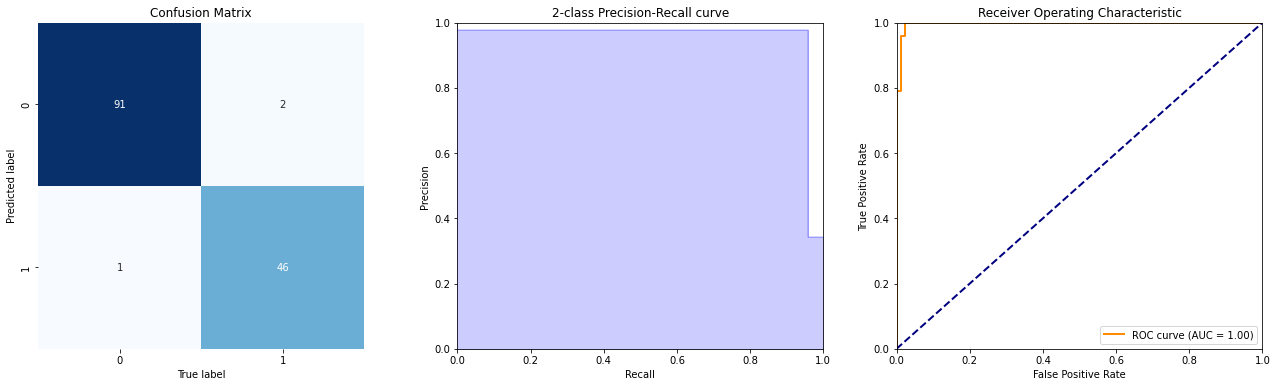

In [354]:
show_summary_report(y_test, y_test_pred, y_test_proba)

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



